In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load Excel data
df = pd.read_excel("netflix_data.xlsx")

In [6]:
# 1. Shape of the data
print("Shape of dataset:", df.shape)

# 2. Columns present
print("\nColumns:", df.columns.tolist())

# 3. Data types of each column
print("\nData types:\n", df.dtypes)

# 4. First 2 rows
print("\nFirst 2 rows:")
print(df.head(2))

# 5. Last 2 rows
print("\nLast 2 rows:")
print(df.tail(2))

Shape of dataset: (6403, 8)

Columns: ['N_id', 'Title', 'Main Genre', 'Sub Genres', 'Release Year', 'Maturity Rating', 'Original Audio', 'Recommendations']

Data types:
 N_id                 int64
Title               object
Main Genre          object
Sub Genres          object
Release Year       float64
Maturity Rating     object
Original Audio      object
Recommendations     object
dtype: object

First 2 rows:
     N_id                           Title Main Genre  \
0  215309      Ace Ventura: Pet Detective     Comedy   
1  215318  Ace Ventura: When Nature Calls     Comedy   

                       Sub Genres  Release Year Maturity Rating  \
0             Comedy, Mystery, US        1994.0               A   
1  Comedy, Action & Adventure, US        1995.0         U/A 16+   

              Original Audio  \
0  Hindi, English [Original]   
1  Hindi, English [Original]   

                                     Recommendations  
0  70184054, 60001650, 70112729, 70027007, 115246...  
1  7018

In [11]:
# 6. Total missing values in each column
print("\nMissing values per column:")
print(df.isna().sum())

# 7. Summary statistics for numeric columns
print("\nSummary statistics:")
print(df.describe())

# 8. Number of unique values in each column
print("\nUnique values per column:")
print(df.nunique())

# 9. Checking for duplicated rows
print("\nNumber of duplicated rows:", df.duplicated().sum())




Missing values per column:
N_id                  0
Title                 0
Main Genre            0
Sub Genres            0
Release Year          1
Maturity Rating       0
Original Audio     2636
Recommendations      11
dtype: int64

Summary statistics:
               N_id  Release Year
count  6.403000e+03   6402.000000
mean   7.971379e+07   2019.077320
std    7.159805e+06      6.094716
min    2.153090e+05   1962.000000
25%    8.022148e+07   2018.000000
50%    8.122164e+07   2021.000000
75%    8.151819e+07   2022.000000
max    8.199405e+07   2025.000000

Unique values per column:
N_id               6403
Title              6350
Main Genre           20
Sub Genres         3257
Release Year         57
Maturity Rating       5
Original Audio      287
Recommendations    6392
dtype: int64

Number of duplicated rows: 0


In [12]:
df.dropna(inplace=True)

In [13]:
df.to_excel("netflix_data_cleaned.xlsx", index=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_7412\1990468408.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='Reds_r')


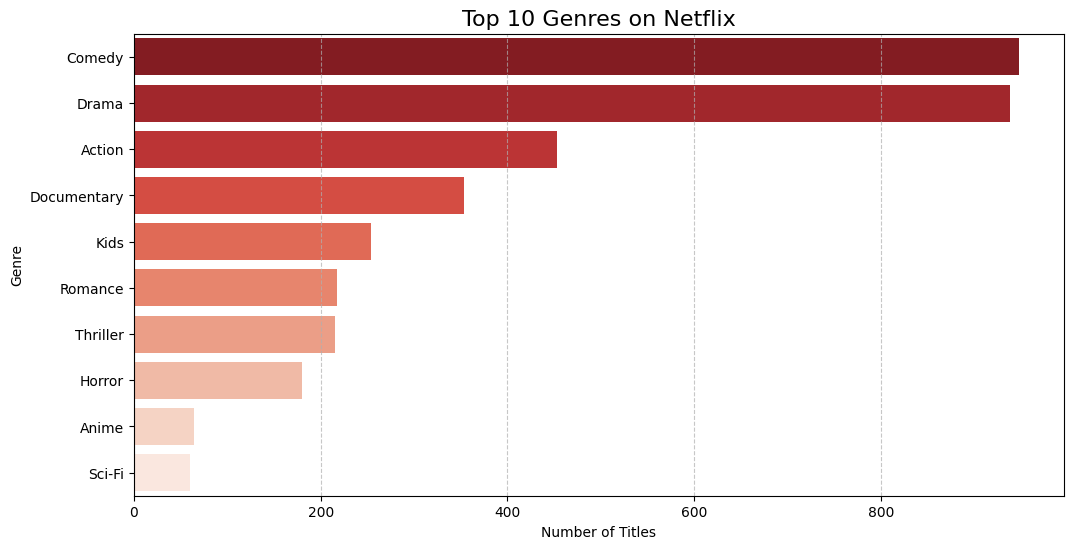

In [15]:
# Chart: Top 10 Genres by Count
top_genres = df['Main Genre'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='Reds_r')
plt.title('Top 10 Genres on Netflix', fontsize=16)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


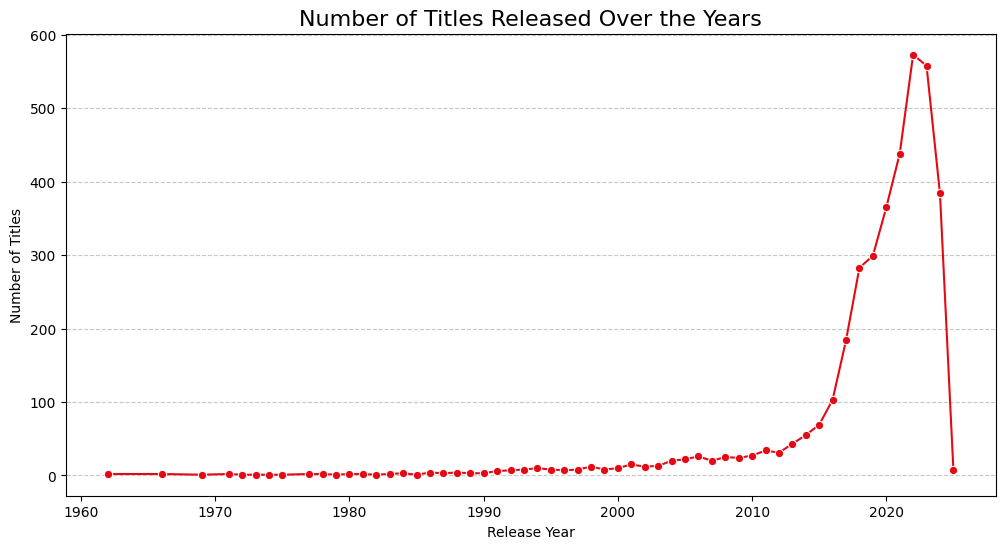

In [17]:
plt.figure(figsize=(12,6))

# Prepare data: count of titles per release year
year_counts = df['Release Year'].value_counts().sort_index()

# Plot line chart
sns.lineplot(x=year_counts.index, y=year_counts.values, color='#E50914', marker='o')
plt.title('Number of Titles Released Over the Years', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7412\11560193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Maturity Rating', y='Release Year', data=df, palette='Reds_r')


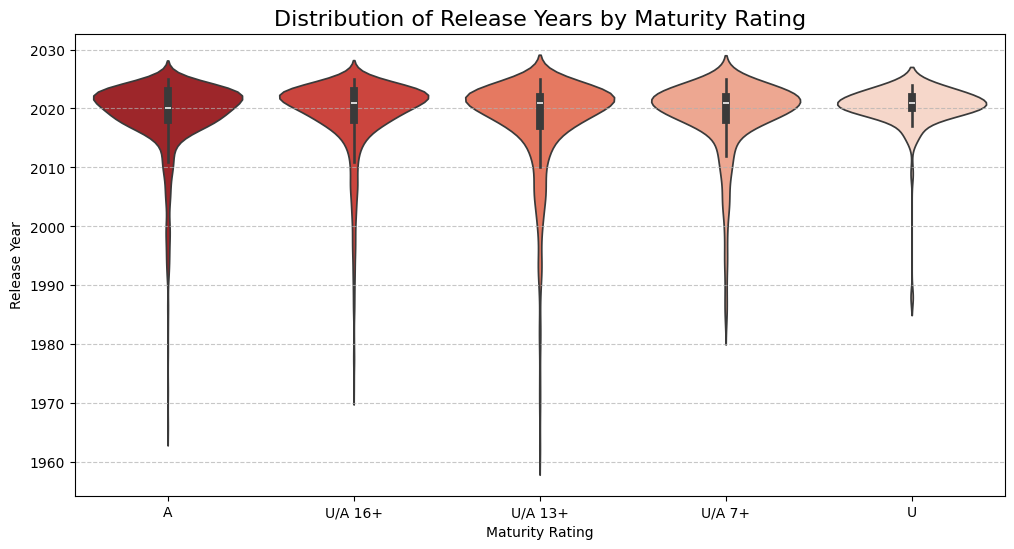

In [18]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Maturity Rating', y='Release Year', data=df, palette='Reds_r')
plt.title('Distribution of Release Years by Maturity Rating', fontsize=16)
plt.xlabel('Maturity Rating')
plt.ylabel('Release Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

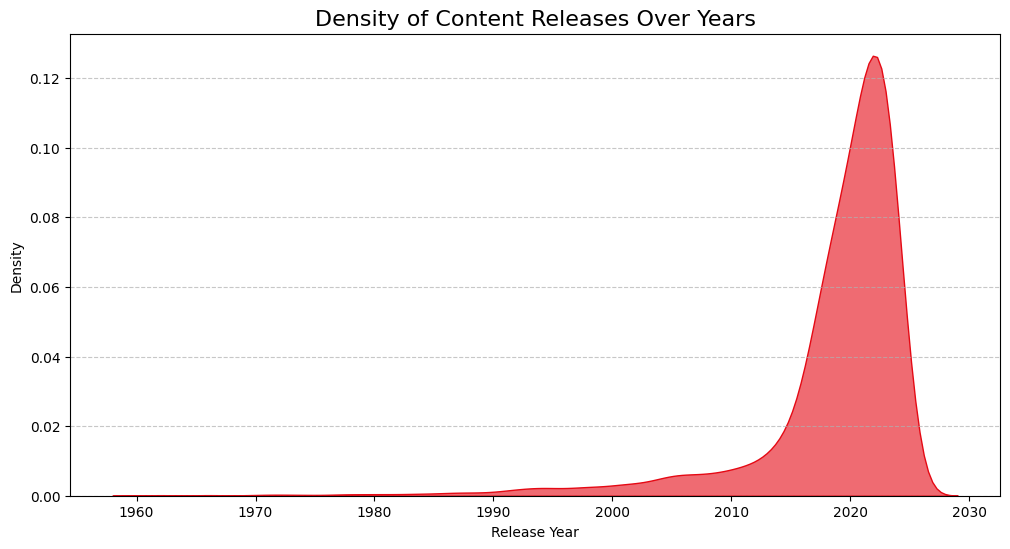

In [19]:
plt.figure(figsize=(12,6))
sns.kdeplot(df['Release Year'].dropna(), fill=True, color='#E50914', alpha=0.6)
plt.title('Density of Content Releases Over Years', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_7412\2472934117.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sub_Genres_Split', data=df_top_sub,


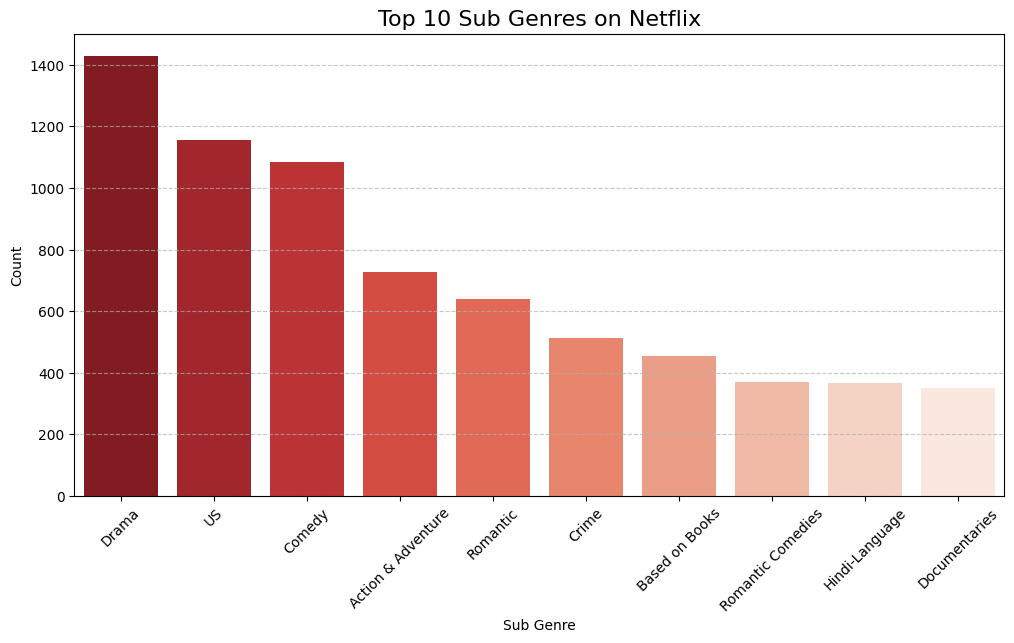

In [25]:
# Find the top 10 sub genres
top_10_sub_genres = df_sub['Sub_Genres_Split'].value_counts().head(10).index.tolist()

# Filter the dataframe to only those top 10
df_top_sub = df_sub[df_sub['Sub_Genres_Split'].isin(top_10_sub_genres)]

# Now plot
plt.figure(figsize=(12,6))
sns.countplot(x='Sub_Genres_Split', data=df_top_sub, 
              order=top_10_sub_genres, 
              palette='Reds_r')
plt.title('Top 10 Sub Genres on Netflix', fontsize=16)
plt.xlabel('Sub Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


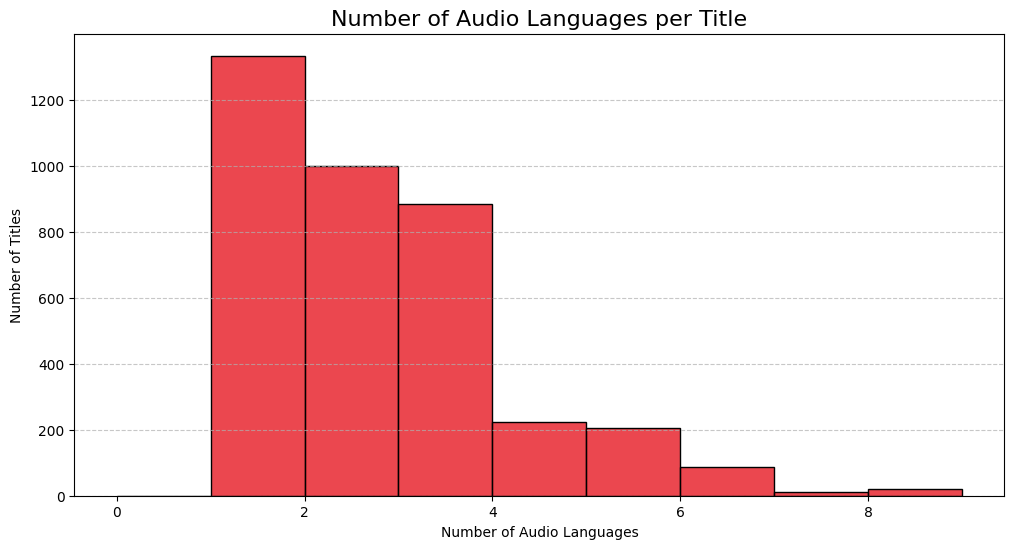

In [21]:
# Compute number of audio languages for each title
df['Num_Audios'] = df['Original Audio'].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 0)

plt.figure(figsize=(12,6))
sns.histplot(df['Num_Audios'], bins=range(0, df['Num_Audios'].max()+2), color='#E50914', edgecolor='black')
plt.title('Number of Audio Languages per Title', fontsize=16)
plt.xlabel('Number of Audio Languages')
plt.ylabel('Number of Titles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


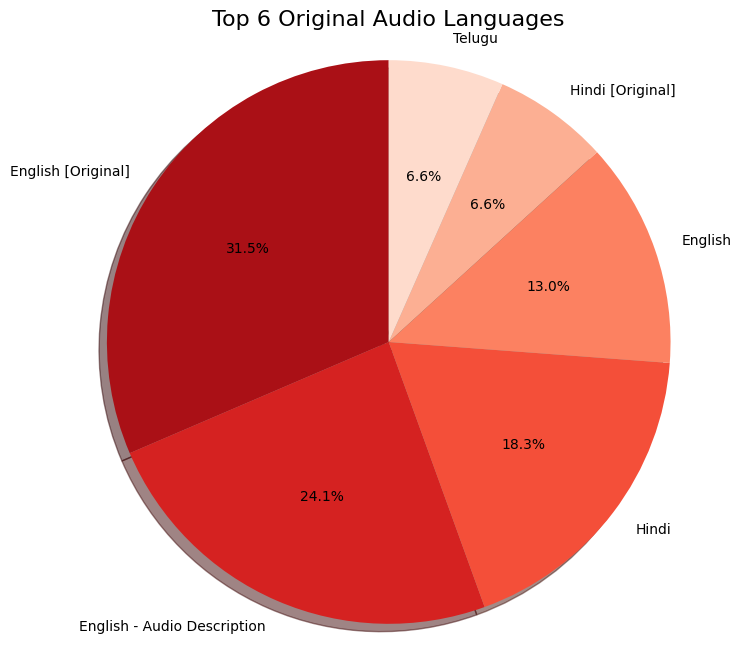

In [23]:
# Explode audio languages into individual rows
df_audio = df.assign(Audio_Split=df['Original Audio'].str.split(',')).explode('Audio_Split')
df_audio['Audio_Split'] = df_audio['Audio_Split'].str.strip()

# Top 6 languages
top_audio_counts = df_audio['Audio_Split'].value_counts().head(6)

plt.figure(figsize=(8,8))
plt.pie(top_audio_counts, labels=top_audio_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette("Reds_r", len(top_audio_counts)),
        startangle=90, shadow=True)
plt.title('Top 6 Original Audio Languages', fontsize=16)
plt.axis('equal')
plt.show()
